# Testando o FFT


Importar bibliotecas

In [2]:

from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
import numpy as np
from matplotlib import pyplot as plt


Informações básicas do audio

In [41]:
fs_rate, signal = wavfile.read("440hz.wav")
print ("Frequencia amostral = ", fs_rate)
l_audio = len(signal.shape)
print ("Canais = ", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0]
print ("Numero de amostras = ", N)
secs = N / float(fs_rate)
print ("Duração do vídeo em segundos = ", secs)
Ts = 1.0/fs_rate
print ("Distancia em tempo entre as amostras = ", Ts)

Frequencia amostral =  44100
Canais =  1
Numero de amostras =  132301
Duração do vídeo em segundos =  3.0000226757369615
Distancia em tempo entre as amostras =  2.2675736961451248e-05


Transformada de Fourier

In [24]:
t = scipy.arange(0, secs, Ts)
FFT = abs(scipy.fft(signal))
FFT_side = FFT[:1500]
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[:1500]
fft_freqs_side = np.array(freqs_side)

Plot do sinal

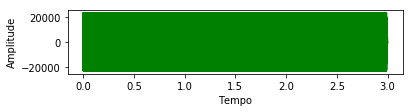

In [42]:
plt.subplot(311)
p1 = plt.plot(t, signal, "g") 
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.show()

Plot da Transformada de Fourier

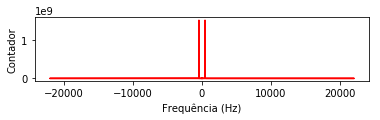

In [43]:
plt.subplot(312)
p2 = plt.plot(freqs, FFT, "r")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Contador')
plt.show()

Plot do espectro positivo da transformada de fourier

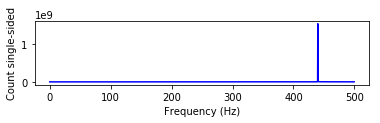

In [10]:
plt.subplot(313)
p3 = plt.plot(freqs_side, abs(FFT_side), "b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()

Encontrado o pico da transformada de fourier que equivale à frequencia do audio analizado

In [39]:
round(max(zip(freqs_side,FFT_side),key=lambda it: it[1])[0],2)

440.0

# Comparação entre onda pura X distorcida

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.fftpack import fft
from scipy.io import wavfile
import scipy

In [9]:
fs1, data1 = wavfile.read('distTest/440pure.wav')
fs2, data2 = wavfile.read('distTest/440dist.wav')

In [10]:
print(fs1, data1, "<--- 440 pure")
print(fs2, data2, "<--- 440 dist")

44100 [    0  2053  4097 ... -6128 -4096 -2054] <--- 440 pure
44100 [    0  5913  8256 ... -9738 -8255 -5914] <--- 440 dist


Dados da primeira wav

In [11]:
l_audio = len(data1.shape)
print ("Canais = ", l_audio)
if l_audio == 2:
    data1 = data1.sum(axis=1) / 2
N = data1.shape[0]
print ("Numero de amostras = ", N)
secs = N / float(fs1)
print ("Duração do vídeo em segundos = ", secs)
Ts = 1.0/fs1
print ("Distancia em tempo entre as amostras = ", Ts)

Canais =  1
Numero de amostras =  132300
Duração do vídeo em segundos =  3.0
Distancia em tempo entre as amostras =  2.2675736961451248e-05


Dados da segunda wav

In [12]:
l_audio2 = len(data2.shape)
print ("Canais = ", l_audio)
if l_audio2 == 2:
    data2 = data2.sum(axis=1) / 2
N2 = data2.shape[0]
print ("Numero de amostras = ", N2)
secs2 = N2 / float(fs2)
print ("Duração do vídeo em segundos = ", secs2)
Ts2 = 1.0/fs2
print ("Distancia em tempo entre as amostras = ", Ts2)

Canais =  1
Numero de amostras =  132300
Duração do vídeo em segundos =  3.0
Distancia em tempo entre as amostras =  2.2675736961451248e-05


#### Tendo o mesmo numero de amostras e a mesma duração podemos comparar os audios

#### Sendo assim vamos calcular as transformadas

onda pura

In [13]:
t1 = scipy.arange(0, secs, Ts)
FFT1 = abs(fft(data1))
FFT_side1 = FFT1[:20000]
freqs1 = scipy.fftpack.fftfreq(data1.size, t1[1]-t1[0])
fft_freqs1 = np.array(freqs1)
freqs_side1 = freqs1[:20000]
fft_freqs_side1 = np.array(freqs_side1)

onda distorcida

In [14]:
t2 = scipy.arange(0, secs2, Ts2)
FFT2 = abs(fft(data2))
FFT_side2 = FFT2[:20000]
freqs2 = scipy.fftpack.fftfreq(data2.size, t2[1]-t2[0])
fft_freqs2 = np.array(freqs2)
freqs_side2 = freqs2[:20000]
fft_freqs_side2 = np.array(freqs_side2)

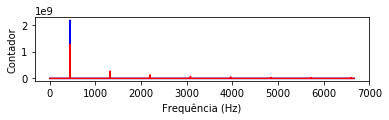

In [15]:
plt.subplot(312)
p1 = plt.plot(freqs_side1, FFT_side1, "b")
p2 = plt.plot(freqs_side2, FFT_side2, "r")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Contador')
plt.show()